In [1]:
import pandas as pd
from pandas import Grouper
from matplotlib import pyplot
from functools import reduce
import re
from texttable import Texttable

pd.options.display.max_colwidth = 1000 # print max 1000 characters
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [2]:
tweets = pd.read_pickle('../tweets_clean_translated_vader_reduced_merged_clean.pickle')
tweets.head(2)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
0,1255325711960768514,@realDonaldTrump,Wed Apr 29 02:39:07 +0000 2020,2020-04-29,en,,THANK YOU MICHAEL! @bittyandbeaus https://t.co/KVXVcdO79E,eng_or_undef,THANK YOU MICHAEL!,0.4199,False,11808,False,NaN,NaN,None,False,50990,False,[2020-04-29 14:21:12],USA,gouvernement_decideurs,person,autres,"[thank, michael]",17
1,1255283103691661313,@realDonaldTrump,Tue Apr 28 23:49:48 +0000 2020,2020-04-28,en,,"RT @GLFOP: Thank you, President @realDonaldTrump, for your steadfast, unapologetic support of law enforcement during #COVID19. From DAY ONE…",eng_or_undef,"Thank you, President , for your steadfast, unapologetic support of law enforcement during covid 19. From DAY ONE…",0.7351,False,5786,False,NaN,NaN,None,False,0,NaN,[2020-04-29 14:21:12],USA,gouvernement_decideurs,person,autres,"[thank, president, steadfast, unapologetic, support, law, enforcement, covid, 1st]",17


In [3]:
tweets.shape

(398672, 26)

In [5]:
#Total of tweets for each country
ll = list()
for Country in tweets.country.unique():
    #print(Country,"->", len(tweets[tweets.country==Country])) 
    ll.append(tuple((len(tweets[tweets.country==Country]),Country)))

ll.sort(reverse = True)
for elem in ll:
    print(elem)        

(40012, 'Inde')
(38922, 'USA')
(34673, 'International')
(34111, 'Allemagne')
(33652, 'France')
(30669, 'Suède')
(28312, 'Espagne')
(23612, 'Brésil')
(21777, 'Royaume-Uni')
(20530, 'Italie')
(19221, 'Canada')
(18007, 'Pologne')
(14606, 'Afrique du Sud')
(11431, 'Australie')
(8086, 'Japon')
(8023, 'Pays-Bas')
(5629, 'EU')
(5389, 'Nouvelle-Zélande')
(2010, 'Corée du Sud')


In [6]:
#Total of tweets for each TYPE
l = list()
for Type in tweets.type.unique():
    l.append(tuple((len(tweets[tweets.type==Type]),Type)))

for elem in sorted(l,reverse=True):
    print(elem)        

(174020, 'gouvernement_decideurs')
(104274, 'expert')
(39076, 'organisation_intergouvernementale')
(37132, 'administration_publique')
(27186, 'academic_institutions')
(16984, 'politicien')


In [7]:
#Tweets only of experts & politiciens
print(len(tweets[tweets.type=="expert"]) , "tweets experts")
print(len(tweets[tweets.type=="politicien"]) ,"tweets politiciens")
print("-> total" , len(tweets[tweets.type=="expert"])+len(tweets[tweets.type=="politicien"]))

104274 tweets experts
16984 tweets politiciens
-> total 121258


## Visualizing all tweets PER COUNTRY PER TYPE

### INDIA CASE

In [8]:
tweets_india = tweets[tweets.country == "Inde"]
tweets_india.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
94109,1255426131647516676,@rashtrapatibhvn,Wed Apr 29 09:18:09 +0000 2020,2020-04-29,hi,hi,"विख्यात अभिनेता इरफान खान के असामयिक निधन से गहरा दुःख हुआ। वे दुर्लभ प्रतिभा-सम्पन्न कलाकार थे। उनकी विविध भूमिकाओं की छाप सदैव हमारे दिलों में अंकित रहेगी । उनका निधन, सिने-जगत व अनगिनत प्रशंसको के लिए अपूरणीय क्षति है। उनके परिवार और प्रियजनों के प्रति मेरी शोक संवेदनाएं।",done,The untimely demise of noted actor Irrfan Khan was deeply saddened. He was a rare talent-rich artist. The imprint of his diverse roles will always be etched in our hearts. His death is an irreparable loss to the cine world and countless fans. My condolences to his family and loved ones.,-0.1761,False,1496,False,NaN,NaN,None,False,14616,NaN,[2020-04-29 16:22:10],Inde,gouvernement_decideurs,person,autres,"[untimely, demise, note, actor, iran, khan, deeply, sadden, rare, talent, rich, artist, imprint, diverse, role, etch, heart, death, irreparable, loss, cine, world, countless, fan, condolence, family, love, one]",17


In [9]:
tweets_india.type.unique()

array(['gouvernement_decideurs', 'academic_institutions', 'expert',
       'politicien', 'administration_publique'], dtype=object)

In [10]:
tweets_india_gouv_decideurs = tweets_india[tweets_india.type=='gouvernement_decideurs']
tweets_india_adminis_publiq = tweets_india[tweets_india.type=='administration_publique']
tweets_india_academic_insti = tweets_india[tweets_india.type=='academic_institutions']
tweets_india_experts = tweets_india[tweets_india.type=='expert']
tweets_india_politicien = tweets_india[tweets_india.type=='politicien']
print(len(tweets_india_gouv_decideurs),len(tweets_india_adminis_publiq),len(tweets_india_academic_insti),len(tweets_india_experts),len(tweets_india_politicien))

24788 6893 2549 2550 3232


In [11]:
tweets_india_gouv_decideurs_day = tweets_india_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_india_gouv_decideurs_day.columns=['total_india_gouv_decideurs']
tweets_india_gouv_decideurs_day.head(1)

,total_india_gouv_decideurs
date_iso,
2019-11-16,17


In [12]:
tweets_india_adminis_publiq_day = tweets_india_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_india_adminis_publiq_day.columns=['total_india_adminis_publiq']
tweets_india_adminis_publiq_day.head(1)

,total_india_adminis_publiq
date_iso,
2019-11-16,6


In [13]:
tweets_india_academic_insti_day = tweets_india_academic_insti.groupby('date_iso')[['id']].count()
tweets_india_academic_insti_day.columns=['total_india_academic_insti']
tweets_india_academic_insti_day.head(1)

,total_india_academic_insti
date_iso,
2019-11-16,12


In [14]:
tweets_india_experts_day = tweets_india_experts.groupby('date_iso')[['id']].count()
tweets_india_experts_day.columns=['total_india_experts']
tweets_india_experts_day.head(1)

,total_india_experts
date_iso,
2019-11-16,7


In [15]:
tweets_india_politicien_day = tweets_india_politicien.groupby('date_iso')[['id']].count()
tweets_india_politicien_day.columns=['total_india_politiciens']
tweets_india_politicien_day.head(1)

,total_india_politiciens
date_iso,
2020-02-13,51


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

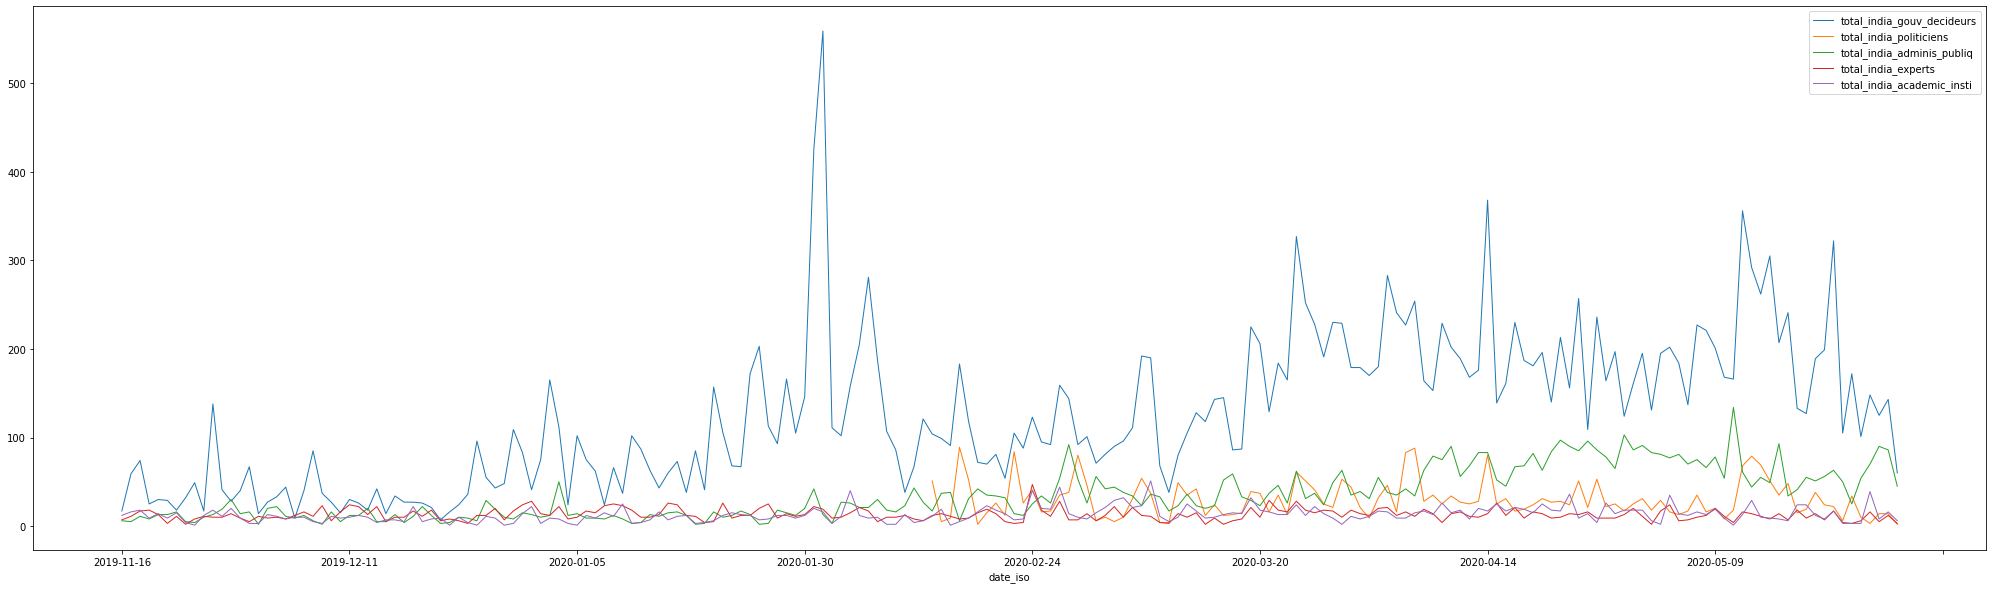

In [16]:
data_frames1 = [tweets_india_gouv_decideurs_day, tweets_india_politicien_day, tweets_india_adminis_publiq_day, tweets_india_experts_day, tweets_india_academic_insti_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frames1)
df_merged.plot.line(figsize=(35,10), lw=1)

### USA CASE

In [17]:
tweets_USA = tweets[tweets.country == "USA"]
tweets_USA.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
0,1255325711960768514,@realDonaldTrump,Wed Apr 29 02:39:07 +0000 2020,2020-04-29,en,,THANK YOU MICHAEL! @bittyandbeaus https://t.co/KVXVcdO79E,eng_or_undef,THANK YOU MICHAEL!,0.4199,False,11808,False,NaN,NaN,None,False,50990,False,[2020-04-29 14:21:12],USA,gouvernement_decideurs,person,autres,"[thank, michael]",17


In [18]:
tweets_USA.type.unique()

array(['gouvernement_decideurs', 'administration_publique',
       'academic_institutions', 'expert'], dtype=object)

In [19]:
tweets_USA_gouv_decideurs = tweets_USA[tweets_USA.type=='gouvernement_decideurs']
tweets_USA_adminis_publiq = tweets_USA[tweets_USA.type=='administration_publique']
tweets_USA_academic_insti = tweets_USA[tweets_USA.type=='academic_institutions']
tweets_USA_experts = tweets_USA[tweets_USA.type=='expert']
print(len(tweets_USA_gouv_decideurs),len(tweets_USA_adminis_publiq),len(tweets_USA_academic_insti),len(tweets_USA_experts))

13948 4228 7976 12770


In [20]:
tweets_USA_gouv_decideurs_day = tweets_USA_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_USA_gouv_decideurs_day.columns=['total_usa_gouv_decideurs']
tweets_USA_gouv_decideurs_day.head(1)

,total_usa_gouv_decideurs
date_iso,
2019-11-16,35


In [21]:
tweets_USA_adminis_publiq_day = tweets_USA_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_USA_adminis_publiq_day.columns=['total_usa_adminis_publiq']
tweets_USA_adminis_publiq_day.head(1)

,total_usa_adminis_publiq
date_iso,
2019-11-16,7


In [22]:
tweets_USA_academic_insti_day = tweets_USA_academic_insti.groupby('date_iso')[['id']].count()
tweets_USA_academic_insti_day.columns=['total_usa_academic_insti']
tweets_USA_academic_insti_day.head(1)

,total_usa_academic_insti
date_iso,
2019-11-16,35


In [23]:
tweets_USA_experts_day = tweets_USA_experts.groupby('date_iso')[['id']].count()
tweets_USA_experts_day.columns=['total_usa_experts']
tweets_USA_experts_day.head(1)

,total_usa_experts
date_iso,
2019-11-16,31


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

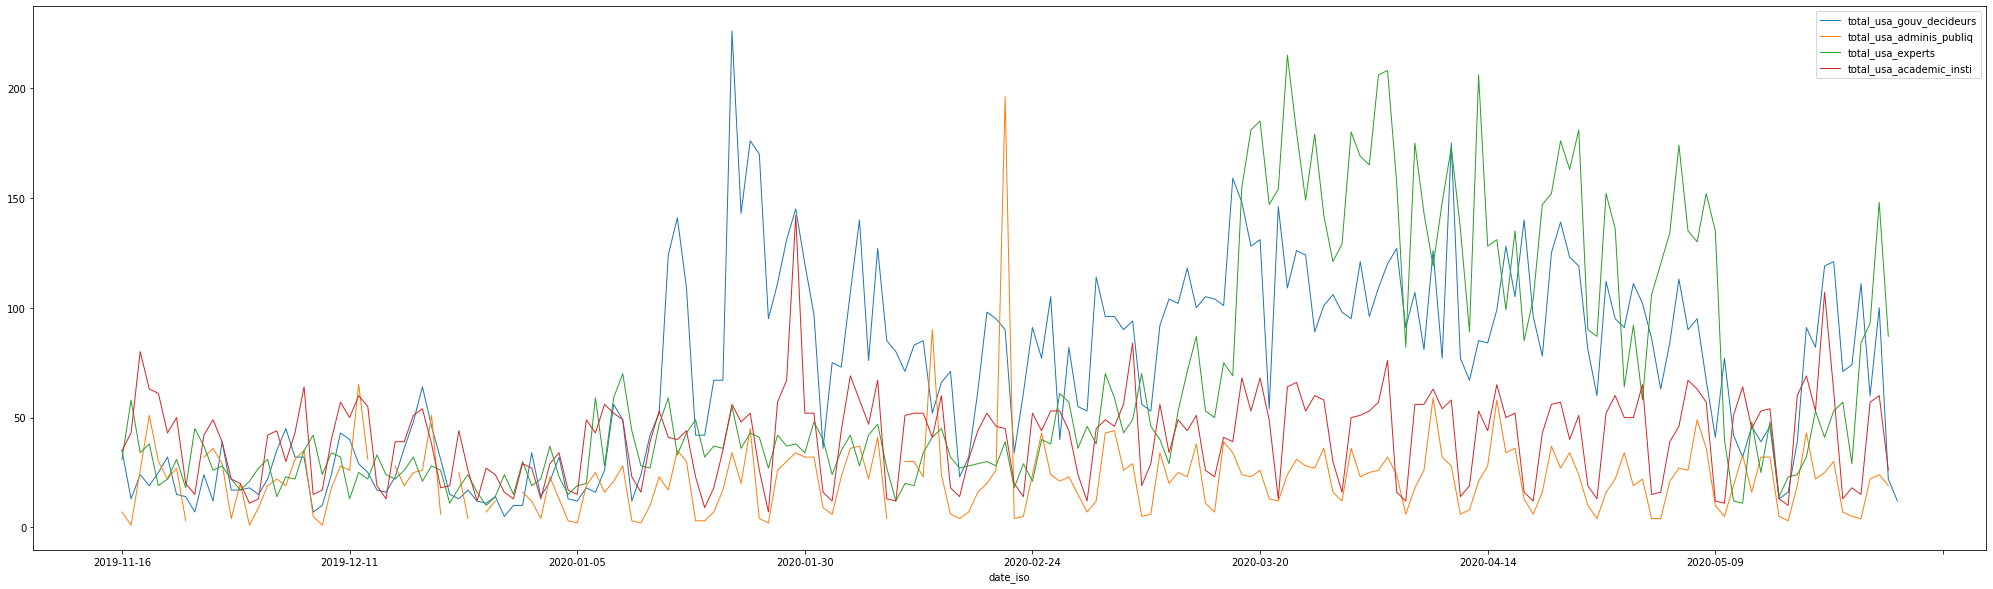

In [24]:
data_frames2 = [tweets_USA_gouv_decideurs_day, tweets_USA_adminis_publiq_day, tweets_USA_experts_day, tweets_USA_academic_insti_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frames2)
df_merged.plot.line(figsize=(35,10), lw=1)

### GERMANY CASE

In [25]:
tweets_germany = tweets[tweets.country == "Allemagne"]
tweets_germany.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
43761,1255482328773799937,@BMG_Bund,Wed Apr 29 13:01:27 +0000 2020,2020-04-29,de,de,"Das Tragen der Alltagsmaske kann dabei helfen, die Ausbreitung des Coronavirus zu begrenzen. Hierbei kommt es jedoch auf den richtigen Umgang mit der Alltagsmaske an. Folgende Hinweise sollten beim Absetzen beachtet werden. https://t.co/4srVi6GcD2",done,"Wearing the everyday mask can help limit the spread of the coronavirus. However, this depends on the correct handling of the everyday mask. The following instructions should be observed when weaning.",0.4019,False,21,False,NaN,NaN,None,False,24,False,[2020-04-29 15:23:55],Allemagne,gouvernement_decideurs,institution,autres,"[wear, everyday, mask, help, limit, spread, coronavirus, depend, correct, handling, everyday, mask, follow, instruction, observe, wean]",17


In [26]:
tweets_germany.type.unique()

array(['gouvernement_decideurs', 'expert', 'academic_institutions',
       'administration_publique', 'politicien'], dtype=object)

In [27]:
tweets_ger_gouv_decideurs = tweets_germany[tweets_germany.type=='gouvernement_decideurs']
tweets_ger_adminis_publiq = tweets_germany[tweets_germany.type=='administration_publique']
tweets_ger_academic_insti = tweets_germany[tweets_germany.type=='academic_institutions']
tweets_ger_experts = tweets_germany[tweets_germany.type=='expert']
tweets_ger_politicien = tweets_germany[tweets_germany.type=='politicien']
print(len(tweets_ger_gouv_decideurs),len(tweets_ger_adminis_publiq),len(tweets_ger_academic_insti),len(tweets_ger_experts),len(tweets_ger_politicien))

8505 653 1343 20503 3107


In [28]:
tweets_ger_gouv_decideurs_day = tweets_ger_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_ger_gouv_decideurs_day.columns=['total_germany_gouv_decideurs']

tweets_ger_adminis_publiq_day = tweets_ger_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_ger_adminis_publiq_day.columns=['total_germany_adminis_publiq']

tweets_ger_academic_insti_day = tweets_ger_academic_insti.groupby('date_iso')[['id']].count()
tweets_ger_academic_insti_day.columns=['total_germany_academic_insti']

tweets_ger_experts_day = tweets_ger_experts.groupby('date_iso')[['id']].count()
tweets_ger_experts_day.columns=['total_germany_experts']

tweets_ger_politiciens_day = tweets_ger_politicien.groupby('date_iso')[['id']].count()
tweets_ger_politiciens_day.columns=['total_germany_politiciens']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

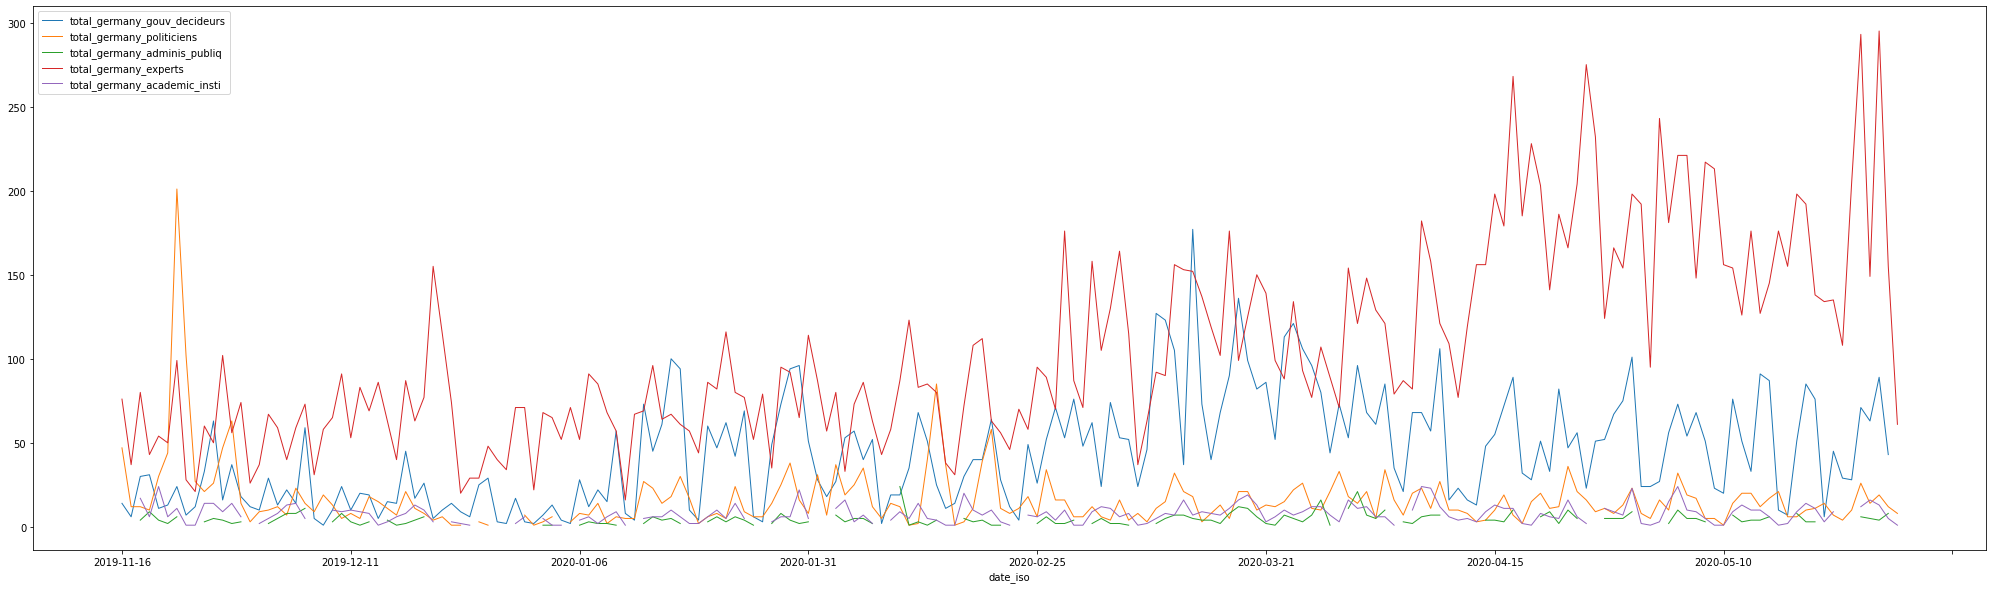

In [29]:
data_frame3 = [tweets_ger_gouv_decideurs_day, tweets_ger_politiciens_day, tweets_ger_adminis_publiq_day, tweets_ger_experts_day, tweets_ger_academic_insti_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame3)
df_merged.plot.line(figsize=(35,10), lw=1)

### FRANCE CASE

In [30]:
tweets_fr = tweets[tweets.country == "France"]
tweets_fr.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
31332,1208135534951960578,@EmmanuelMacron,Fri Dec 20 21:22:12 +0000 2019,2019-12-20,fr,fr,"Soldats, marins et aviateurs, avant de partager le repas de Noël avec vous et vos camarades à Abidjan, je tiens à vous assurer une nouvelle fois de ma confiance et à vous exprimer la reconnaissance de la Nation, de vos compatriotes pour ce que vous faites, pour ce que vous êtes. https://t.co/Q7guXzqZYf",done,"Soldiers, sailors and airmen, before sharing the Christmas meal with you and your comrades in Abidjan, I want to assure you once again of my confidence and to express to you the gratitude of the Nation, of your compatriots for what you do , for what you are.",0.9022,False,704,False,NaN,NaN,None,False,3118,False,[2020-04-29 15:13:08],France,gouvernement_decideurs,person,autres,"[soldier, sailor, airman, share, christmas, meal, comrade, abidjan, assure, confidence, express, gratitude, nation, compatriot]",4


In [31]:
tweets_fr.type.unique()

array(['gouvernement_decideurs', 'administration_publique',
       'academic_institutions', 'expert', 'politicien'], dtype=object)

In [32]:
tweets_fr_gouv_decideurs = tweets_fr[tweets_fr.type=='gouvernement_decideurs']
tweets_fr_adminis_publiq = tweets_fr[tweets_fr.type=='administration_publique']
tweets_fr_academic_insti = tweets_fr[tweets_fr.type=='academic_institutions']
tweets_fr_experts = tweets_fr[tweets_fr.type=='expert']
tweets_fr_politicien = tweets_fr[tweets_fr.type=='politicien']
print(len(tweets_fr_gouv_decideurs),len(tweets_fr_adminis_publiq),len(tweets_fr_academic_insti),len(tweets_fr_experts),len(tweets_fr_politicien))

21847 8827 1795 924 259


In [33]:
tweets_fr_gouv_decideurs_day = tweets_fr_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_fr_gouv_decideurs_day.columns=['total_france_gouv_decideurs']

tweets_fr_adminis_publiq_day = tweets_fr_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_fr_adminis_publiq_day.columns=['total_france_adminis_publiq']

tweets_fr_academic_insti_day = tweets_fr_academic_insti.groupby('date_iso')[['id']].count()
tweets_fr_academic_insti_day.columns=['total_france_academic_insti']

tweets_fr_experts_day = tweets_fr_experts.groupby('date_iso')[['id']].count()
tweets_fr_experts_day.columns=['total_france_experts']

tweets_fr_politiciens_day = tweets_fr_politicien.groupby('date_iso')[['id']].count()
tweets_fr_politiciens_day.columns=['total_france_politiciens']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

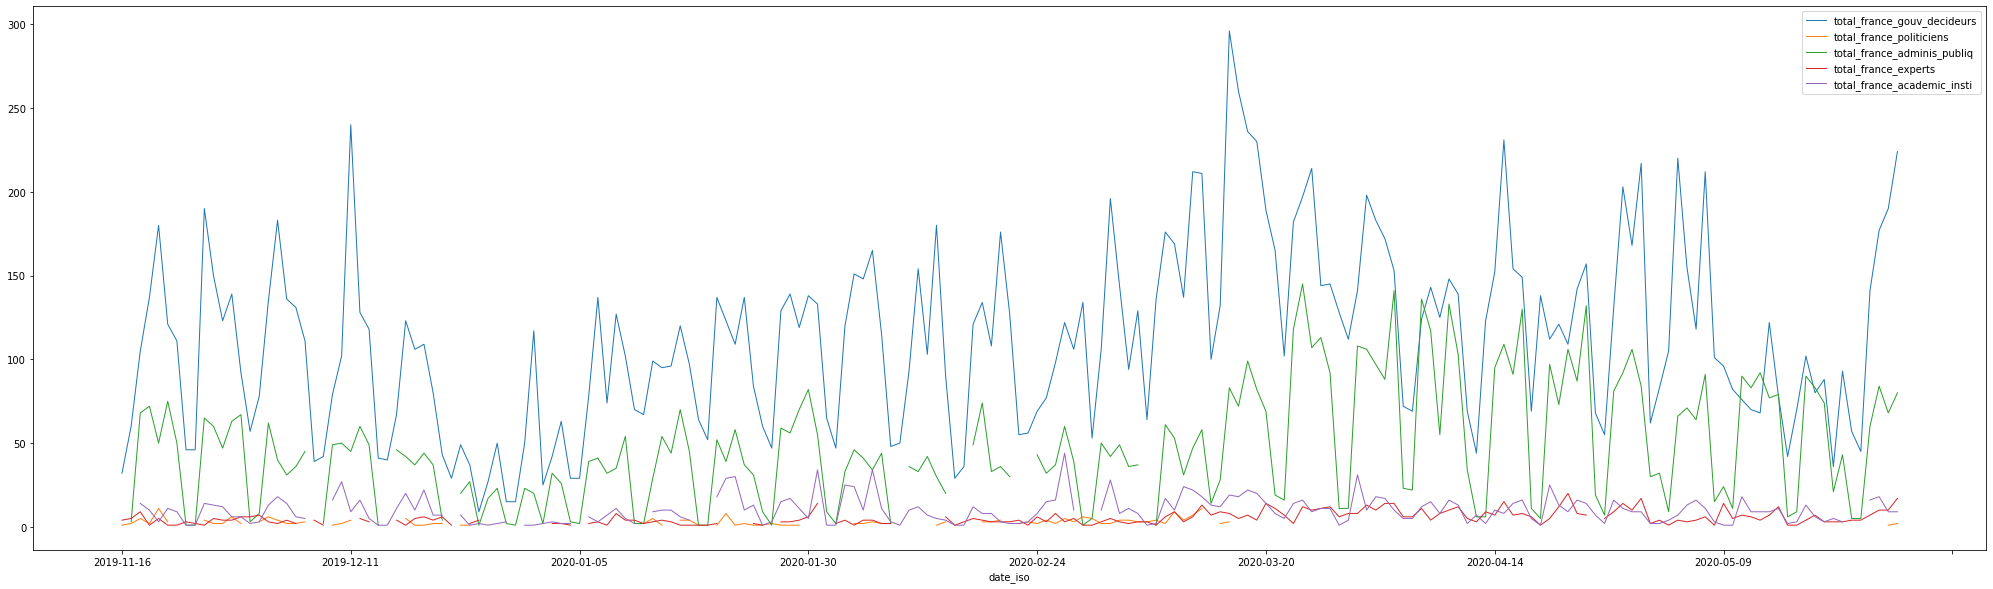

In [34]:
data_frame4 = [tweets_fr_gouv_decideurs_day, tweets_fr_politiciens_day, tweets_fr_adminis_publiq_day, tweets_fr_experts_day, tweets_fr_academic_insti_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame4)
df_merged.plot.line(figsize=(35,10), lw=1)

### SWEDEN CASE

In [35]:
tweets_swd = tweets[tweets.country == "Suède"]
tweets_swd.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
145033,1205850940693196800,@lenahallengren,Sat Dec 14 14:04:02 +0000 2019,2019-12-14,sv,sv,En sjukvård för alla. https://t.co/fLyjqyBfkW,done,A health care for everyone.,0.4939,False,3,True,1.205814e+18,NaN,None,False,33,False,[2020-04-29 18:02:27],Suède,gouvernement_decideurs,person,sante,"[health, care]",3


In [36]:
tweets_swd.type.unique()

array(['gouvernement_decideurs', 'administration_publique', 'expert',
       'politicien'], dtype=object)

In [37]:
tweets_swd_gouv_decideurs = tweets_swd[tweets_swd.type=='gouvernement_decideurs']
tweets_swd_adminis_publiq = tweets_swd[tweets_swd.type=='administration_publique']
tweets_swd_experts = tweets_swd[tweets_swd.type=='expert']
tweets_swd_politicien = tweets_swd[tweets_swd.type=='politicien']
print(len(tweets_swd_gouv_decideurs),len(tweets_swd_adminis_publiq),len(tweets_swd_experts),len(tweets_swd_politicien))

851 769 25201 3848


In [38]:
tweets_swd_gouv_decideurs_day = tweets_swd_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_swd_gouv_decideurs_day.columns=['total_sweden_gouv_decideurs']

tweets_swd_adminis_publiq_day = tweets_swd_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_swd_adminis_publiq_day.columns=['total_sweden_adminis_publiq']

tweets_swd_experts_day = tweets_swd_experts.groupby('date_iso')[['id']].count()
tweets_swd_experts_day.columns=['total_sweden_experts']

tweets_swd_politiciens_day = tweets_swd_politicien.groupby('date_iso')[['id']].count()
tweets_swd_politiciens_day.columns=['total_sweden_politiciens']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

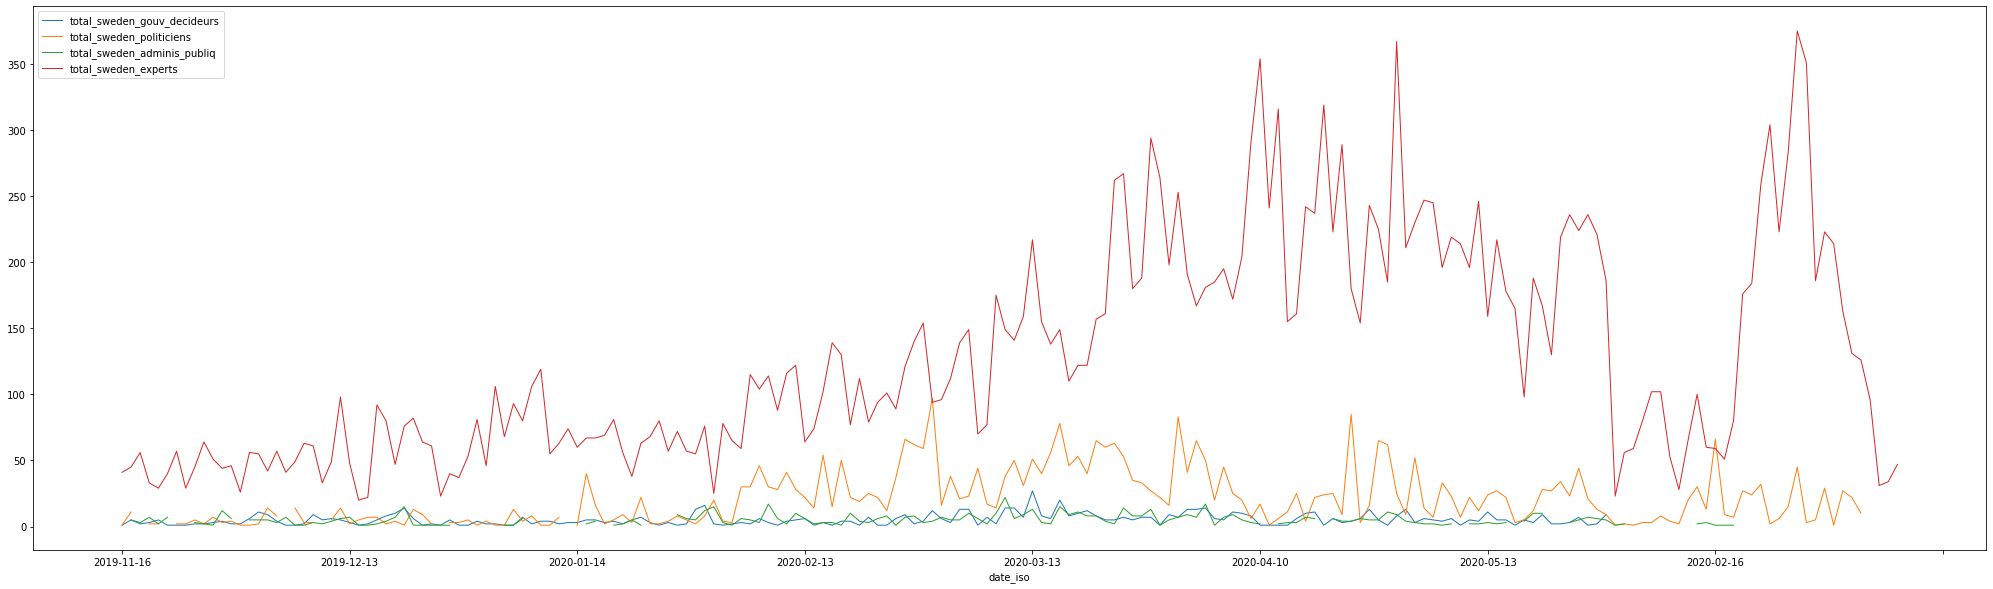

In [39]:
data_frame5 = [tweets_swd_gouv_decideurs_day, tweets_swd_politiciens_day, tweets_swd_adminis_publiq_day, tweets_swd_experts_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame5)
df_merged.plot.line(figsize=(35,10), lw=1)

### SPAIN CASE

In [40]:
tweets_spain = tweets[tweets.country == "Espagne"]
tweets_spain.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
113075,1238008228576927746,@sanchezcastejon,Thu Mar 12 07:45:37 +0000 2020,2020-03-12,es,es,"Hoy se reúne el #CMIN que aprobará medidas del Plan de Choque en respuesta al #COVID19. El Gobierno, en coordinación con las Comunidades Autónomas, hará lo que haga falta, cuando y donde haga falta. Juntos tenemos que #FrenarLaCurva https://t.co/8i3fIkcOLN",done,"Today the cmin meets to approve measures of the Shock Plan in response to the covid 19. The Government, in coordination with the Autonomous Communities, will do what is necessary, when and where it is necessary. Together we have to stop the curve",-0.5859,False,628,True,1.237985e+18,NaN,None,False,1809,False,[2020-04-29 16:43:49],Espagne,gouvernement_decideurs,person,autres,"[today, min, meet, approve, measure, shock, plan, response, covid, 1st, government, coordination, autonomous, community, necessary, necessary, stop, curve]",12


In [41]:
tweets_spain.type.unique()

array(['gouvernement_decideurs', 'academic_institutions', 'expert',
       'politicien', 'administration_publique'], dtype=object)

In [42]:
tweets_spain_gouv_decideurs = tweets_spain[tweets_spain.type=='gouvernement_decideurs']
tweets_spain_adminis_publiq = tweets_spain[tweets_spain.type=='administration_publique']
tweets_spain_academic_insti = tweets_spain[tweets_spain.type=='academic_institutions']
tweets_spain_experts = tweets_spain[tweets_spain.type=='expert']
tweets_spain_politicien = tweets_spain[tweets_spain.type=='politicien']
print(len(tweets_spain_gouv_decideurs),len(tweets_spain_adminis_publiq),len(tweets_spain_academic_insti),len(tweets_spain_experts),len(tweets_spain_politicien))

16012 281 6662 1806 3551


In [43]:
tweets_spain_gouv_decideurs_day = tweets_spain_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_spain_gouv_decideurs_day.columns=['total_spain_gouv_decideurs']

tweets_spain_adminis_publiq_day = tweets_spain_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_spain_adminis_publiq_day.columns=['total_spain_adminis_publiq']

tweets_spain_academic_insti_day = tweets_spain_academic_insti.groupby('date_iso')[['id']].count()
tweets_spain_academic_insti_day.columns=['total_spain_academic_insti']

tweets_spain_experts_day = tweets_spain_experts.groupby('date_iso')[['id']].count()
tweets_spain_experts_day.columns=['total_spain_experts']

tweets_spain_politiciens_day = tweets_spain_politicien.groupby('date_iso')[['id']].count()
tweets_spain_politiciens_day.columns=['total_spain_politiciens']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

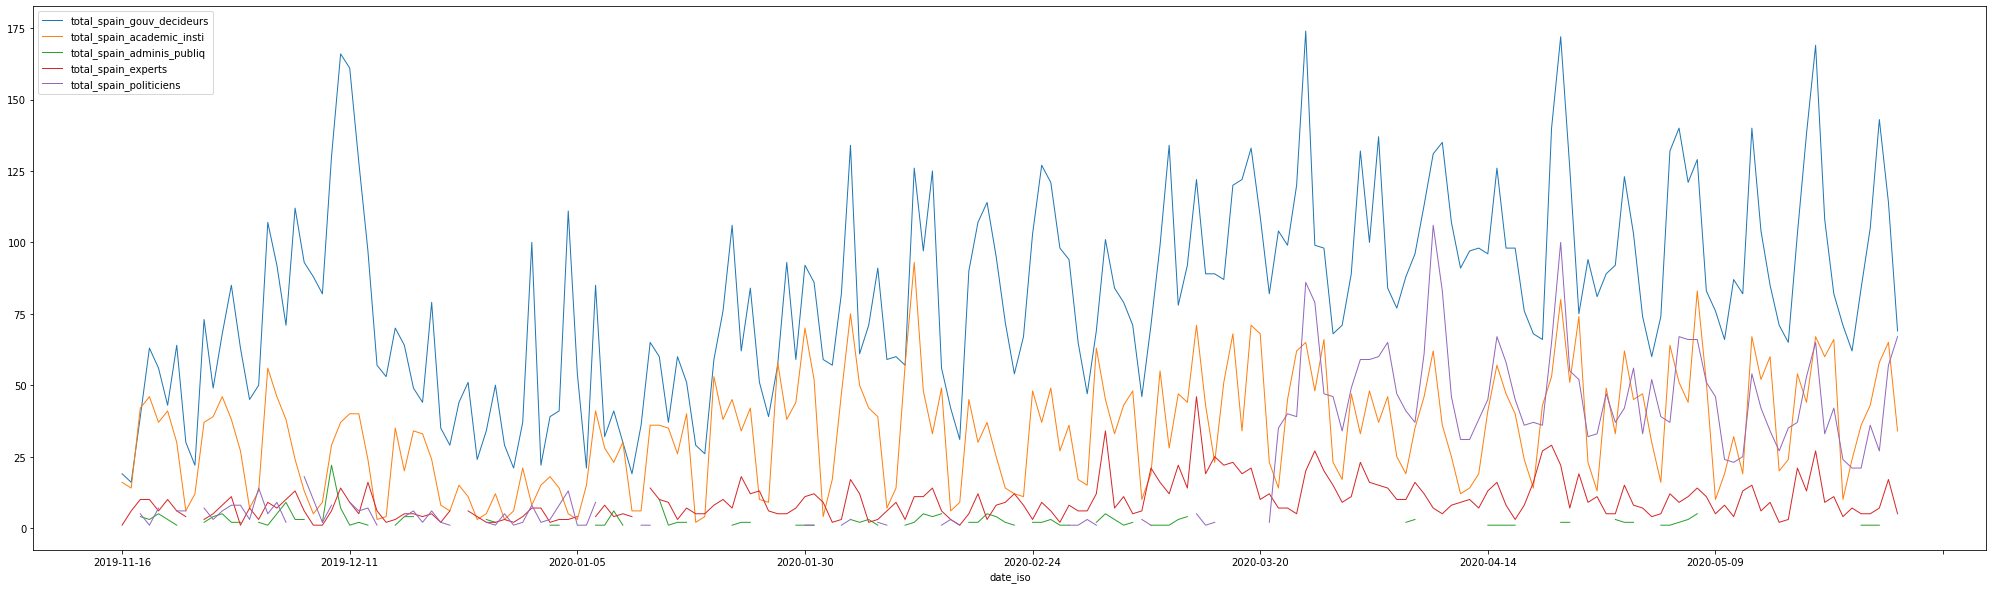

In [44]:
data_frame6 = [tweets_spain_gouv_decideurs_day, tweets_spain_academic_insti_day, tweets_spain_adminis_publiq_day, tweets_spain_experts_day, tweets_spain_politiciens_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame6)
df_merged.plot.line(figsize=(35,10), lw=1)

### BRAZIL CASE

In [45]:
tweets_brz = tweets[tweets.country == "Brésil"]
tweets_brz.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
85838,1255438921791668225,@jairbolsonaro,Wed Apr 29 10:08:58 +0000 2020,2020-04-29,pt,pt,4- Conclusão do Hospital de Campanha do Governo Federal em Águas Lindas (GO); 5- Convocação emergencial de quase 2 mil profissionais de saúde para hospitais universitários; 6- Envio de mais 13 voluntários da Força Nacional do SUS a Manaus-AM;,done,4- Completion of the Federal Government's Campaign Hospital in Águas Lindas (GO); 5- Emergency call of almost 2 thousand health professionals to university hospitals; 6- Sending 13 more volunteers from the National Force of SUS to Manaus-AM;,-0.3818,False,846,False,NaN,1.255439e+18,jairbolsonaro,False,4083,NaN,[2020-04-29 16:16:48],Brésil,gouvernement_decideurs,person,autres,"[completion, federal, government, campaign, hospital, gas, linda, emergency, health, professional, university, hospital, send, volunteer, national, force, manaus]",17


In [46]:
tweets_brz.type.unique()

array(['gouvernement_decideurs', 'administration_publique', 'expert',
       'academic_institutions'], dtype=object)

In [47]:
tweets_brz_gouv_decideurs = tweets_brz[tweets_brz.type=='gouvernement_decideurs']
tweets_brz_adminis_publiq = tweets_brz[tweets_brz.type=='administration_publique']
tweets_brz_academic_insti = tweets_brz[tweets_brz.type=='academic_institutions']
tweets_brz_experts = tweets_brz[tweets_brz.type=='expert']
print(len(tweets_brz_gouv_decideurs),len(tweets_brz_adminis_publiq),len(tweets_brz_academic_insti),len(tweets_brz_experts))

21400 1274 563 375


In [48]:
tweets_brz_gouv_decideurs_day = tweets_brz_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_brz_gouv_decideurs_day.columns=['total_brazil_gouv_decideurs']

tweets_brz_adminis_publiq_day = tweets_brz_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_brz_adminis_publiq_day.columns=['total_brazil_adminis_publiq']

tweets_brz_academic_insti_day = tweets_brz_academic_insti.groupby('date_iso')[['id']].count()
tweets_brz_academic_insti_day.columns=['total_brazil_academic_insti']

tweets_brz_experts_day = tweets_brz_experts.groupby('date_iso')[['id']].count()
tweets_brz_experts_day.columns=['total_brazil_experts']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

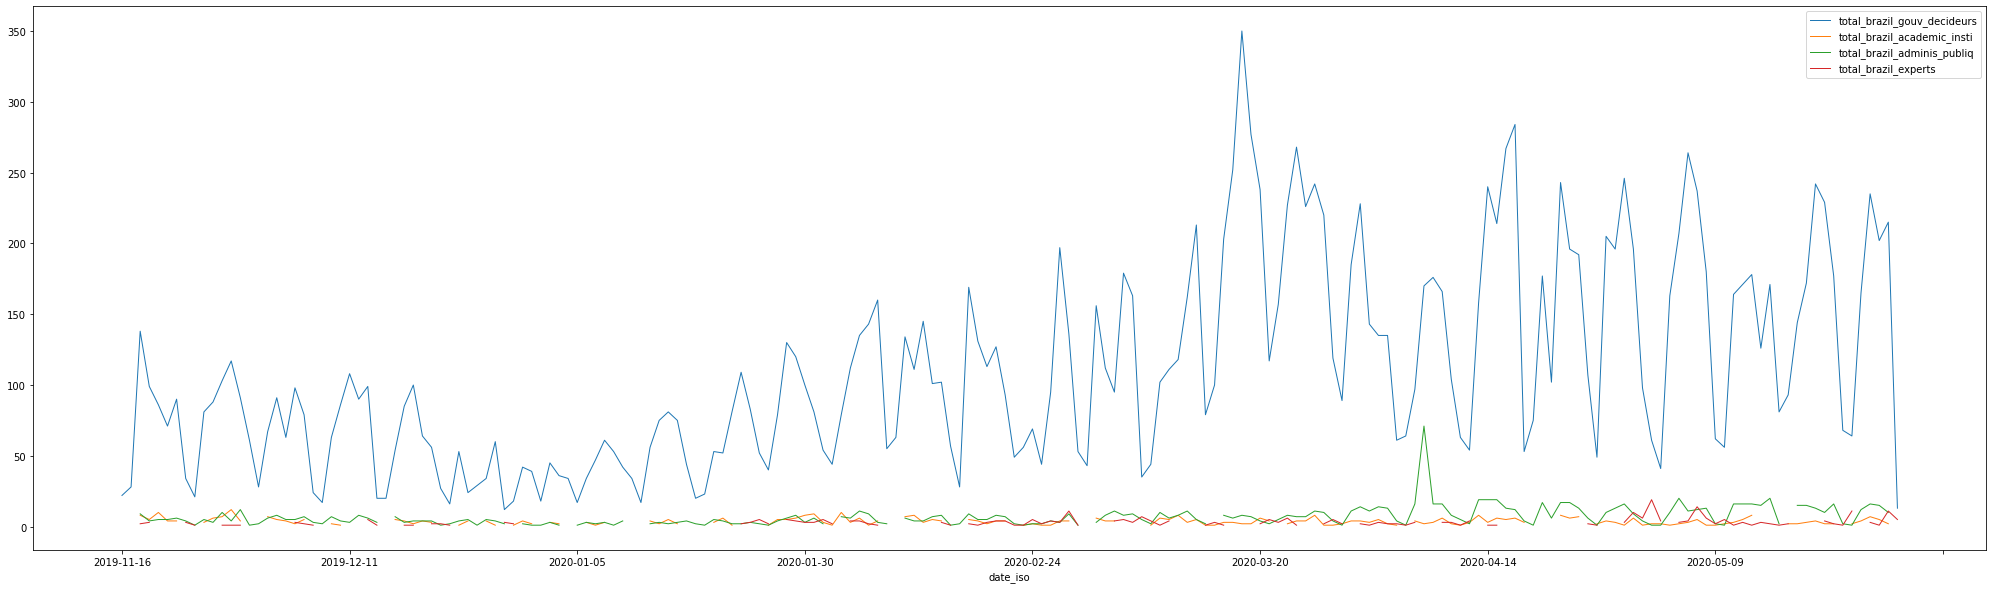

In [49]:
data_frame7 = [tweets_brz_gouv_decideurs_day, tweets_brz_academic_insti_day, tweets_brz_adminis_publiq_day, tweets_brz_experts_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame7)
df_merged.plot.line(figsize=(35,10), lw=1)

### UK CASE

In [50]:
tweets_uk = tweets[tweets.country == "Royaume-Uni"]
tweets_uk.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
52746,1255122187243204608,@BorisJohnson,Tue Apr 28 13:10:23 +0000 2020,2020-04-28,en,,"We've got to keep going. Follow the guidance on social distancing, and stay at home to protect our NHS and save lives. https://t.co/N2gfpmQcDM",eng_or_undef,"We've got to keep going. Follow the guidance on social distancing, and stay at home to protect our NHS and save lives.",0.7003,False,1232,False,NaN,NaN,None,False,8120,False,[2020-04-29 15:30:00],Royaume-Uni,gouvernement_decideurs,person,autres,"[get, go, follow, guidance, social, distance, stay, home, protect, nhs, save, life]",17


In [51]:
tweets_uk.type.unique()

array(['gouvernement_decideurs', 'administration_publique', 'expert',
       'academic_institutions', 'politicien'], dtype=object)

In [52]:
tweets_uk_gouv_decideurs = tweets_uk[tweets_uk.type=='gouvernement_decideurs']
tweets_uk_adminis_publiq = tweets_uk[tweets_uk.type=='administration_publique']
tweets_uk_academic_insti = tweets_uk[tweets_uk.type=='academic_institutions']
tweets_uk_experts = tweets_uk[tweets_uk.type=='expert']
tweets_uk_politiciens = tweets_uk[tweets_uk.type=='politicien']
print(len(tweets_uk_gouv_decideurs),len(tweets_uk_adminis_publiq),len(tweets_uk_academic_insti),len(tweets_uk_experts),len(tweets_uk_politiciens))

11132 153 2000 5879 2613


In [53]:
tweets_uk_gouv_decideurs_day = tweets_uk_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_uk_gouv_decideurs_day.columns=['total_uk_gouv_decideurs']

tweets_uk_adminis_publiq_day = tweets_uk_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_uk_adminis_publiq_day.columns=['total_uk_adminis_publiq']

tweets_uk_academic_insti_day = tweets_uk_academic_insti.groupby('date_iso')[['id']].count()
tweets_uk_academic_insti_day.columns=['total_uk_academic_insti']

tweets_uk_experts_day = tweets_uk_experts.groupby('date_iso')[['id']].count()
tweets_uk_experts_day.columns=['total_uk_experts']

tweets_uk_politiciens_day = tweets_uk_politiciens.groupby('date_iso')[['id']].count()
tweets_uk_politiciens_day.columns=['total_uk_politiciens']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

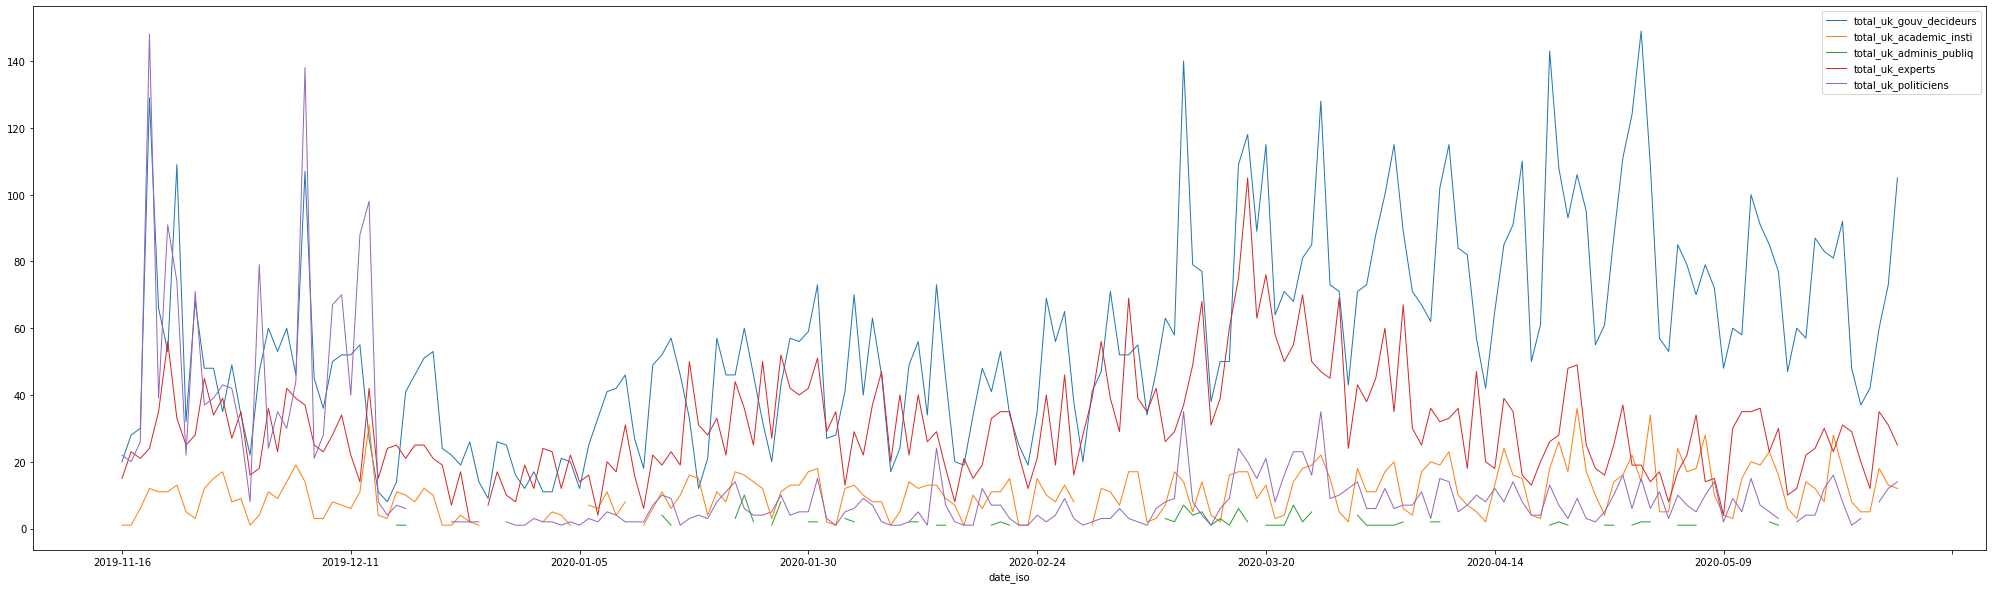

In [54]:
data_frame8 = [tweets_uk_gouv_decideurs_day, tweets_uk_academic_insti_day, tweets_uk_adminis_publiq_day, tweets_uk_experts_day, tweets_uk_politiciens_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame8)
df_merged.plot.line(figsize=(35,10), lw=1)

### ITALY case

In [55]:
tweets_italy = tweets[tweets.country == "Italie"]
tweets_italy.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
60810,1254081183115366400,@Quirinale,Sat Apr 25 16:13:48 +0000 2020,2020-04-25,it,it,#25Aprile le #freccetricolori sorvolano il #Quirinale 🇮🇹 https://t.co/UMec75dETK,done,April 25th the tricolor f ices fly over the quirinal 🇮🇹,0.0,False,2310,False,NaN,NaN,None,False,9066,False,[2020-04-29 15:35:31],Italie,gouvernement_decideurs,institution,autres,"[april, tricolour, ice, fly, urinal]",17


In [56]:
tweets_italy.type.unique()

array(['gouvernement_decideurs', 'expert', 'administration_publique',
       'academic_institutions'], dtype=object)

In [57]:
tweets_itl_gouv_decideurs = tweets_italy[tweets_italy.type=='gouvernement_decideurs']
tweets_itl_adminis_publiq = tweets_italy[tweets_italy.type=='administration_publique']
tweets_itl_academic_insti = tweets_italy[tweets_italy.type=='academic_institutions']
tweets_itl_experts = tweets_italy[tweets_italy.type=='expert']
print(len(tweets_itl_gouv_decideurs),len(tweets_itl_adminis_publiq),len(tweets_itl_academic_insti),len(tweets_itl_experts))

3400 1157 365 15608


In [58]:
tweets_itl_gouv_decideurs_day = tweets_itl_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_itl_gouv_decideurs_day.columns=['total_italy_gouv_decideurs']

tweets_itl_adminis_publiq_day = tweets_itl_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_itl_adminis_publiq_day.columns=['total_italy_adminis_publiq']

tweets_itl_academic_insti_day = tweets_itl_academic_insti.groupby('date_iso')[['id']].count()
tweets_itl_academic_insti_day.columns=['total_italy_academic_insti']

tweets_itl_experts_day = tweets_itl_experts.groupby('date_iso')[['id']].count()
tweets_itl_experts_day.columns=['total_italy_experts']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

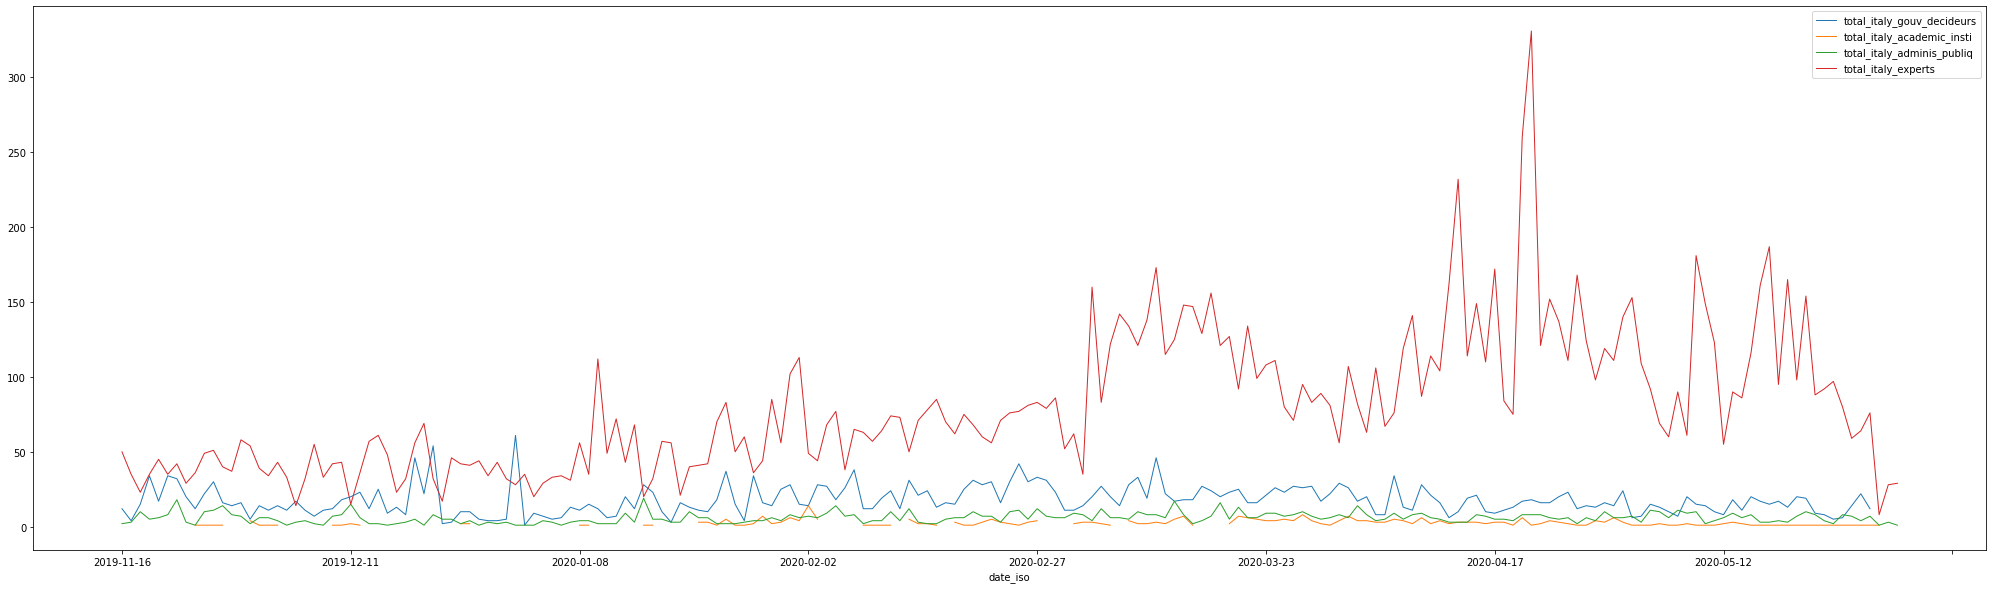

In [59]:
data_frame9 = [tweets_itl_gouv_decideurs_day, tweets_itl_academic_insti_day, tweets_itl_adminis_publiq_day, tweets_itl_experts_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame9)
df_merged.plot.line(figsize=(35,10), lw=1)

### CANADA case

In [60]:
tweets_cnd = tweets[tweets.country == "Canada"]
tweets_cnd.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
70646,1255308007312941056,@JustinTrudeau,Wed Apr 29 01:28:46 +0000 2020,2020-04-29,en,,"Update on personal protective equipment: We'll be sending over 6 million surgical masks to the provinces and territories this week. More than 100,000 face shields from @BauerHockey and Toronto Stamp are also ready and will be shipped out soon - and there are more on the way.",eng_or_undef,Update on personal protective equipment: We'll be sending over 6 million surgical masks to the provinces and territories this week. More than 100 000 face shields from and Toronto Stamp are also ready and will be shipped out soon - and there are more on the way.,0.3612,False,487,False,NaN,NaN,None,False,3038,NaN,[2020-04-29 16:04:10],Canada,gouvernement_decideurs,person,autres,"[update, personal, protective, equipment, send, surgical, mask, province, territory, 1st, face, shield, toronto, stamp, ready, ship, soon]",17


In [61]:
tweets_cnd.type.unique()

array(['gouvernement_decideurs', 'administration_publique',
       'academic_institutions'], dtype=object)

In [62]:
tweets_cnd_gouv_decideurs = tweets_cnd[tweets_cnd.type=='gouvernement_decideurs']
tweets_cnd_adminis_publiq = tweets_cnd[tweets_cnd.type=='administration_publique']
tweets_cnd_academic_insti = tweets_cnd[tweets_cnd.type=='academic_institutions']
print(len(tweets_cnd_gouv_decideurs),len(tweets_cnd_adminis_publiq),len(tweets_cnd_academic_insti))

14283 3699 1239


In [63]:
tweets_cnd_gouv_decideurs_day = tweets_cnd_gouv_decideurs.groupby('date_iso')[['id']].count()
tweets_cnd_gouv_decideurs_day.columns=['total_canada_gouv_decideurs']

tweets_cnd_adminis_publiq_day = tweets_cnd_adminis_publiq.groupby('date_iso')[['id']].count()
tweets_cnd_adminis_publiq_day.columns=['total_canada_adminis_publiq']

tweets_cnd_academic_insti_day = tweets_cnd_academic_insti.groupby('date_iso')[['id']].count()
tweets_cnd_academic_insti_day.columns=['total_canada_academic_insti']

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

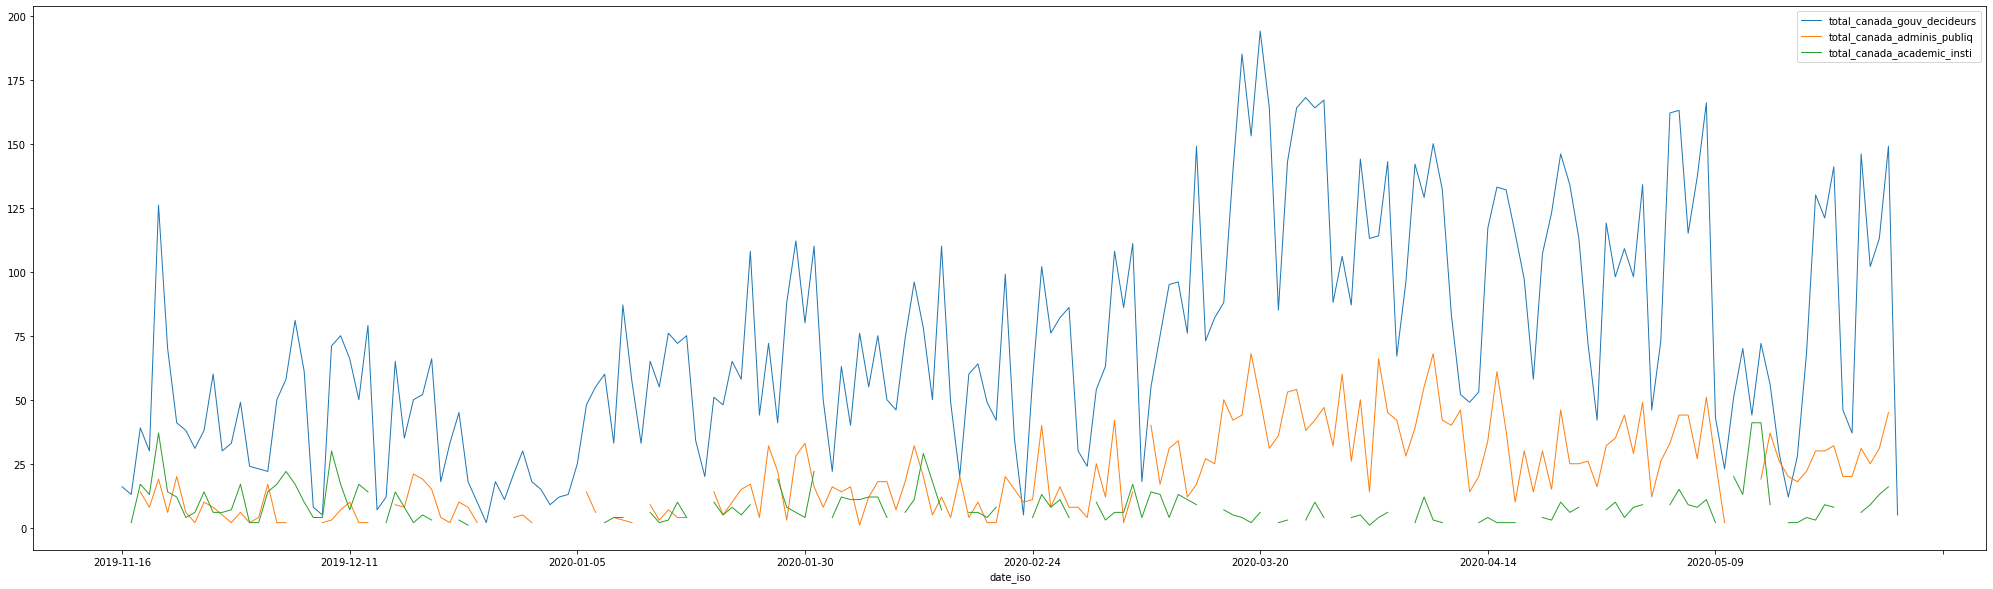

In [64]:
data_frame10 = [tweets_cnd_gouv_decideurs_day, tweets_cnd_adminis_publiq_day, tweets_cnd_academic_insti_day]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frame10)
df_merged.plot.line(figsize=(35,10), lw=1)

In [67]:
ctry_nbrTw_nbrAcc = []

for i in range(len(ll)):
    country = ll[i][1]
    #print(country)
    
    sub_df = tweets[tweets.country == country]
    for Type in sub_df.type.unique():
        nbrTwPerType = len(sub_df[sub_df.type==Type])
        nbrAccountPerType = len(sub_df[sub_df.type==Type].screen_name.unique())
        ctry_nbrTw_nbrAcc.append(tuple((country, Type, nbrTwPerType, nbrAccountPerType)))
    #print(ctry_nbrTw_nbrAcc)
    
    #print("______________")

In [73]:
for test_type in tweets.type.unique():
    print(test_type)

gouvernement_decideurs
administration_publique
academic_institutions
expert
organisation_intergouvernementale
politicien


In [74]:
# Corrected the cases with zeros manually
ctry_nbrTw_nbrAcc.append(tuple(('Afrique du Sud', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Allemagne', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Australie', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Australie', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Brésil', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Brésil', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Canada', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Canada', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Canada', 'expert', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Corée du Sud', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Corée du Sud', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Corée du Sud', 'expert', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Corée du Sud', 'administration_publique', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('EU', 'academic_institutions', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('EU', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('EU', 'expert', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('EU', 'administration_publique', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('EU', 'gouvernement_decideurs', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Espagne', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('France', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Inde', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('International', 'academic_institutions', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('International', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('International', 'administration_publique', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('International', 'gouvernement_decideurs', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Italie', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Italie', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Japon', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Japon', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Japon', 'academic_institutions', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Nouvelle-Zélande', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Pays-Bas', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Pays-Bas', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Pays-Bas', 'academic_institutions', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Pologne', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Pologne', 'politicien', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Royaume-Uni', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Suède', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('Suède', 'academic_institutions', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('USA', 'organisation_intergouvernementale', 0, 0)))
ctry_nbrTw_nbrAcc.append(tuple(('USA', 'politicien', 0, 0)))

In [75]:
ctry_nbrTw_nbrAcc.sort()

In [76]:
ctry_nbrTw_nbrAcc

[('Afrique du Sud', 'academic_institutions', 288, 1),
 ('Afrique du Sud', 'administration_publique', 1780, 2),
 ('Afrique du Sud', 'expert', 76, 2),
 ('Afrique du Sud', 'gouvernement_decideurs', 12354, 8),
 ('Afrique du Sud', 'organisation_intergouvernementale', 108, 1),
 ('Afrique du Sud', 'politicien', 0, 0),
 ('Allemagne', 'academic_institutions', 1343, 6),
 ('Allemagne', 'administration_publique', 653, 3),
 ('Allemagne', 'expert', 20503, 16),
 ('Allemagne', 'gouvernement_decideurs', 8505, 7),
 ('Allemagne', 'organisation_intergouvernementale', 0, 0),
 ('Allemagne', 'politicien', 3107, 2),
 ('Australie', 'academic_institutions', 716, 2),
 ('Australie', 'administration_publique', 624, 4),
 ('Australie', 'expert', 6260, 3),
 ('Australie', 'gouvernement_decideurs', 3831, 6),
 ('Australie', 'organisation_intergouvernementale', 0, 0),
 ('Australie', 'politicien', 0, 0),
 ('Brésil', 'academic_institutions', 563, 1),
 ('Brésil', 'administration_publique', 1274, 4),
 ('Brésil', 'expert', 37

In [77]:
df_stat = pd.DataFrame(ctry_nbrTw_nbrAcc, columns=['country','type','nbTw','nbAcc'])
df_stat['nbTw | nbAcc'] = df_stat[df_stat.columns[2:]].apply(
    lambda x: ' | '.join(x.dropna().astype(str)),
    axis=1
)
df_stat = df_stat.drop(columns=['nbTw', 'nbAcc'])
df_stat

,country,type,nbTw | nbAcc
0,Afrique du Sud,academic_institutions,288 | 1
1,Afrique du Sud,administration_publique,1780 | 2
2,Afrique du Sud,expert,76 | 2
3,Afrique du Sud,gouvernement_decideurs,12354 | 8
4,Afrique du Sud,organisation_intergouvernementale,108 | 1
5,Afrique du Sud,politicien,0 | 0
6,Allemagne,academic_institutions,1343 | 6
7,Allemagne,administration_publique,653 | 3
8,Allemagne,expert,20503 | 16
9,Allemagne,gouvernement_decideurs,8505 | 7


In [78]:
df_compar = pd.crosstab(index=df_stat.iloc[:,0], columns=df_stat.iloc[:,1], values=df_stat.iloc[:,2], aggfunc='sum')

In [79]:
#Rename columns
df_compar = df_compar.rename(columns={"academic_institutions": "academic_insti", 
                                      "administration_publique": "administ_publiq",
                                      "gouvernement_decideurs": "gouv_decideurs",
                                      "organisation_intergouvernementale": "orga_intergouv",
                                      "expert": "experts",
                                      "politicien": "politiciens"})

df_compar = df_compar[['gouv_decideurs', 'politiciens', 'experts', 'administ_publiq', 'academic_insti', 'orga_intergouv']]

In [80]:
# nbTweet|nbAccount
df_compar = df_compar.sort_values(by ='gouv_decideurs' , ascending=False)
df_compar

type,gouv_decideurs,politiciens,experts,administ_publiq,academic_insti,orga_intergouv
country,,,,,,
Suède,851 | 3,3848 | 2,25201 | 9,769 | 5,0 | 0,0 | 0
Allemagne,8505 | 7,3107 | 2,20503 | 16,653 | 3,1343 | 6,0 | 0
Corée du Sud,698 | 4,0 | 0,0 | 0,0 | 0,1312 | 1,0 | 0
Nouvelle-Zélande,553 | 3,374 | 1,4216 | 4,200 | 3,46 | 1,0 | 0
Pays-Bas,4526 | 5,0 | 0,1438 | 3,2059 | 3,0 | 0,0 | 0
Australie,3831 | 6,0 | 0,6260 | 3,624 | 4,716 | 2,0 | 0
Italie,3400 | 7,0 | 0,15608 | 7,1157 | 4,365 | 1,0 | 0
Japon,2815 | 8,0 | 0,3577 | 4,1694 | 6,0 | 0,0 | 0
Inde,24788 | 14,3232 | 1,2550 | 4,6893 | 4,2549 | 3,0 | 0


In [81]:
df_compar.to_pickle("df_matrix_comparisison.pickle")